- Aim of the problem is to find the health insurance cost incured by individuals based on their age, BMI, number of children, smoking habit, and geo-location.
- Features available:
    - sex
    - bmi
    - age
    - smoker
    - children: number of children covered by health insurance (dependents)
    - region: beneficiary's residential area
    - (target) charges: individual medical costs billed by health insurance

[Data Source from Kaggle](https://www.kaggle.com/mirichoi0218/insurance)

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('insurance.csv')

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


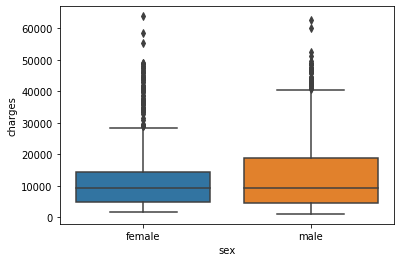

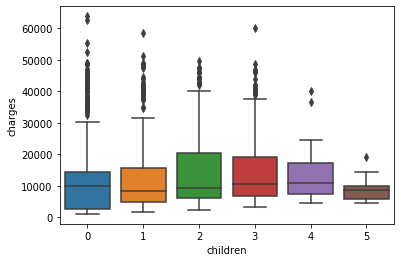

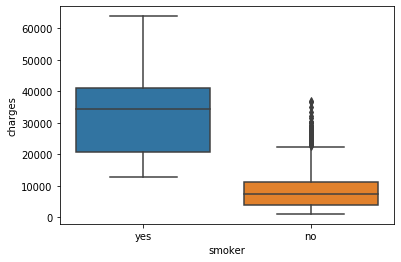

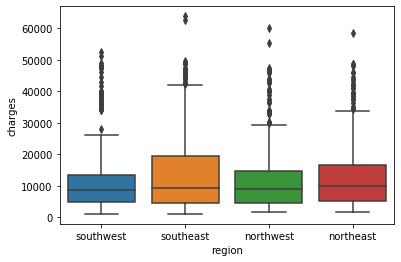

In [6]:
sns.boxplot(x='sex', y='charges', data=data)
plt.show()

sns.boxplot(x='children', y='charges', data=data)
plt.show()

sns.boxplot(x='smoker', y='charges', data=data)
plt.show()

sns.boxplot(x='region', y='charges', data=data)
plt.show()

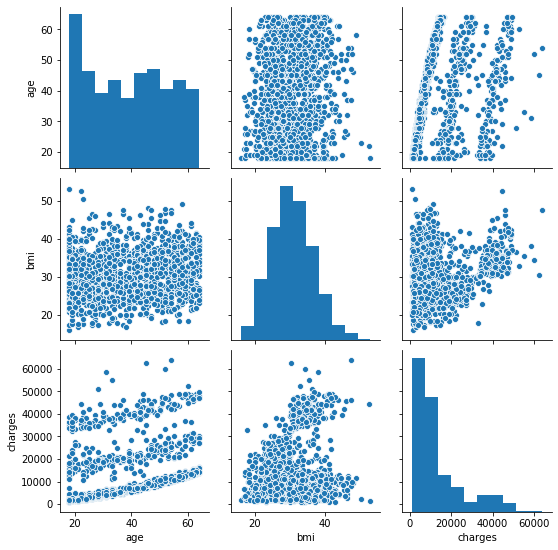

In [7]:
sns.pairplot(data[['age', 'bmi', 'charges']])
plt.show()

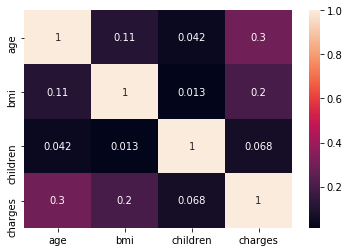

In [8]:
sns.heatmap(data.corr(), annot=True)

In [9]:
# grouping by region to see any relationships
data.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [14]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [15]:
data[['age', 'charges', 'bmi']].describe()

,age,charges,bmi
count,1338.000000,1338.000000,1338.000000
mean,39.207025,13270.422265,30.663397
std,14.049960,12110.011237,6.098187
min,18.000000,1121.873900,15.960000
25%,27.000000,4740.287150,26.296250
50%,39.000000,9382.033000,30.400000
75%,51.000000,16639.912515,34.693750
max,64.000000,63770.428010,53.130000


In [16]:
X = data.drop('charges', axis=1).to_numpy(dtype='float32')
y = data['charges'].to_numpy(dtype='float32').reshape(-1,1)

In [17]:
print(X.shape, y.shape)

(1338, 8) (1338, 1)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler().fit(X_train)
scaler_y = StandardScaler().fit(y_train)

X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = regression_model.predict(X_test)

In [34]:
y_test_orig = scaler_y.inverse_transform(y_test)
y_pred_orig = scaler_y.inverse_transform(y_pred)

In [19]:
k = X_test.shape[1]
n = len(X_test)


mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
r2_adj = 1-(1-r2)*(n-1)/(n-k-1)


In [20]:
print(f'MSE: {mse}\nRMSE: {rmse}\nMAE: {mae}\nR2: {r2}\nAdjusted R2: {r2_adj}')

MSE: 37607392.0
RMSE: 6132.48681640625
MAE: 4291.05712890625
R2: 0.7554494091486675
Adjusted R2: 0.7478957229447654


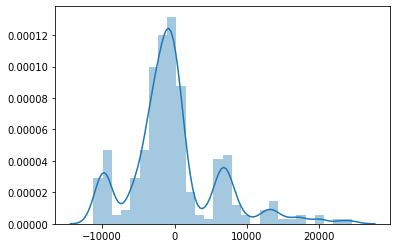

In [21]:
errors = y_test_orig - y_pred_orig
sns.distplot(errors)
plt.show()

# Sagemaker

In [22]:
import sagemaker
import boto3

sagemaker_session = sagemaker.Session()

bucket = 'sagemaker-studio-ehsxkd5xxqm'
prefix = 'linear_learner'

role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::569429297813:role/service-role/AmazonSageMaker-ExecutionRole-20200812T185815


In [23]:
import io
import numpy as np
import sagemaker.amazon.common as smac
import os

# Need to transform data into appropriate format for Sagemaker
# then upload data to s3

buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, X_train, y_train.flatten())
buf.seek(0)

key = 'linear-train-data'

boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)



In [24]:
# get s3 locations for where data is and where output should go

s3_train_data = f's3://{bucket}/{prefix}/train/{key}'
print(f'The data is stored at: {s3_train_data}')

output_location = f's3://{bucket}/{prefix}/output'
print(f'Training output will be stored at: {output_location}')

The data is stored at: s3://sagemaker-studio-ehsxkd5xxqm/linear_learner/train/linear-train-data
Training output will be stored at: s3://sagemaker-studio-ehsxkd5xxqm/linear_learner/output


In [25]:
# Model

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

linear = sagemaker.estimator.Estimator(container, 
                                      role,
                                      train_instance_count=1,
                                      train_instance_type='ml.c4.xlarge',
                                      output_path = output_location,
                                      sagemaker_session = sagemaker_session,
                                      train_use_spot_instances=True, 
                                      train_max_run=1*60*60, 
                                       train_max_wait=1*60*60,
                                      )

linear.set_hyperparameters(feature_dim=X.shape[1],
                          predictor_type='regressor',
                          mini_batch_size=100,
                          epochs=100,
                          num_models=3,
                          loss='squared_loss')


linear.fit({'train': s3_train_data})

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-08-14 18:56:19 Starting - Starting the training job...
2020-08-14 18:56:22 Starting - Launching requested ML instances......
2020-08-14 18:57:38 Starting - Preparing the instances for training.........
2020-08-14 18:59:05 Downloading - Downloading input data......
2020-08-14 19:00:18 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[08/14/2020 19:00:22 INFO 140598095816512] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u

In [26]:
# let us deploy
from sagemaker.predictor import csv_serializer, json_deserializer

linear_regressor = linear.deploy(initial_instance_count=1,
                                instance_type='ml.m4.xlarge')

linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

result = linear_regressor.predict(X_test)

y_pred = np.array([r['score'] for r in result['predictions']])

-----------------!

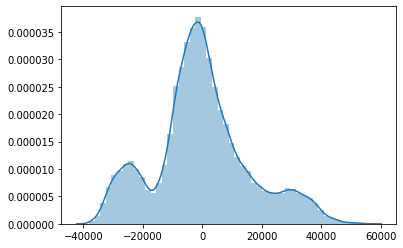

In [27]:
y_pred_orig = scaler_y.inverse_transform(y_pred)
errors = y_test_orig - y_pred_orig
sns.distplot(errors)

In [28]:
mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
r2_adj = 1-(1-r2)*(n-1)/(n-k-1)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAE: {mae}\nR2: {r2}\nAdjusted R2: {r2_adj}')

MSE: 37481792.84655471
RMSE: 6122.237568614494
MAE: 4374.296842450768
R2: 0.7562661686526104
Adjusted R2: 0.7487377105414941


In [ ]:
linear_regressor.delete_endpoint()

Now let us try a neural net. The data looks highly nonlinear so maybe a linear model is not ideal.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [42]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim=8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss='mse', optimizer='Adam')
ANN_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 50)                450       
_________________________________________________________________
activation_18 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 150)               7650      
_________________________________________________________________
activation_19 (Activation)   (None, 150)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 150)               22650     
_________________________________________________________________
activation_20 (Activation)   (None, 150)              

In [26]:
!pip install livelossplot

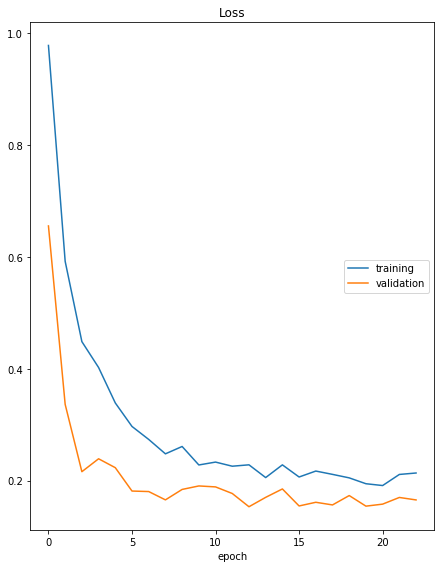

Loss
	training         	 (min:    0.191, max:    0.978, cur:    0.214)
	validation       	 (min:    0.153, max:    0.655, cur:    0.166)
9/9 - 0s - loss: 0.2137 - val_loss: 0.1656


In [43]:
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger
from livelossplot.inputs.tf_keras import PlotLossesCallback

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min', restore_best_weights=False)
callbacks = [PlotLossesCallback(), early_stopping]

epochs_hist = ANN_model.fit(X_train, y_train, 
                            epochs=100, 
                            batch_size=100,
                            validation_split=0.2,
                            verbose=2,
                           callbacks=callbacks)

In [44]:
y_pred = ANN_model.predict(X_test)

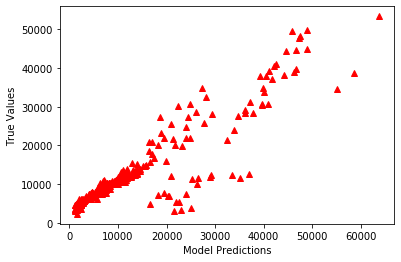

In [45]:
# Let us know plot model predictions vs true values
y_pred_orig = scaler_y.inverse_transform(y_pred)
plt.plot(y_test_orig, y_pred_orig, '^', color='red')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.show()

In [46]:
k = X_test.shape[1]
n = len(X_test)


mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
r2_adj = 1-(1-r2)*(n-1)/(n-k-1)
print(f'MSE: {mse}\nRMSE: {rmse}\nMAE: {mae}\nR2: {r2}\nAdjusted R2: {r2_adj}')

MSE: 33561288.0
RMSE: 5793.21044921875
MAE: 3653.1640625
R2: 0.8043448201956098
Adjusted R2: 0.7983014169584086


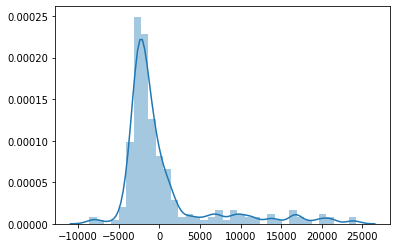

In [47]:
errors = y_test_orig - y_pred_orig
sns.distplot(errors)
plt.show()